In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from datetime import datetime ,time

# Load data


*   src: 'src_target_sentiment_2.csv'
*   reply: 'reply_target_sentiment.csv'




## Source data

In [2]:
src = pd.read_csv(r"sydneysiege\18 targetanalysis\temporalanalysis\src_target_sentiment.csv",encoding = 'utf-8', header = 0,index_col=0)
src

,sentiment_beforetarget,neg_to_pos_beforetarget,count_of_rows_bef,sentiment_target,sentiment_aftertarget,neg_to_pos_aftertarget,count_of_rows_after
Column1,,,,,,,
0,NaN,NaN,0,Neutral,NaN,NaN,0
1,NaN,NaN,0,Neutral,NaN,NaN,0
2,NaN,NaN,0,Neutral,{'Neutral': 1.0},0.00,1
3,{'Neutral': 1.0},0.0,1,Positive,{'Neutral': 1.0},0.00,1
4,{'Neutral': 1.0},0.0,1,Negative,NaN,NaN,0
...,...,...,...,...,...,...,...
79,{'Neutral': 1.0},0.0,1,Negative,NaN,NaN,0
80,NaN,NaN,0,Negative,"{'Negative': 0.67, 'Neutral': 0.33}",inf,3
81,"{'Negative': 0.67, 'Neutral': 0.33}",inf,3,Negative,"{'Positive': 0.31, 'Neutral': 0.38, 'Negative'...",1.00,13


In [3]:
src.sentiment_target = pd.Categorical(src.sentiment_target, categories=['Negative','Positive','Neutral'])

In [4]:
print(src['sentiment_target'].value_counts(sort = False))
src['sentiment_target'].value_counts(normalize=True,sort=False)

Negative    31
Positive     4
Neutral     49
Name: sentiment_target, dtype: int64


### inf ratio

In [5]:
print(f'# of inf ratio:{np.isinf(src.neg_to_pos_aftertarget).sum()}')
src.loc[src.neg_to_pos_aftertarget == np.inf,]

# of inf ratio:10


,sentiment_beforetarget,neg_to_pos_beforetarget,count_of_rows_bef,sentiment_target,sentiment_aftertarget,neg_to_pos_aftertarget,count_of_rows_after
Column1,,,,,,,
14,{'Neutral': 1.0},0.0,1,Neutral,{'Negative': 1.0},inf,1
21,NaN,NaN,0,Neutral,"{'Neutral': 0.8, 'Negative': 0.2}",inf,5
25,{'Positive': 1.0},0.0,1,Neutral,"{'Neutral': 0.86, 'Negative': 0.14}",inf,7
33,NaN,NaN,0,Neutral,{'Negative': 1.0},inf,1
40,{'Positive': 1.0},0.0,1,Positive,{'Negative': 1.0},inf,1
41,{'Negative': 1.0},inf,1,Negative,"{'Neutral': 0.8, 'Negative': 0.2}",inf,5
44,{'Positive': 1.0},0.0,1,Neutral,"{'Neutral': 0.92, 'Negative': 0.08}",inf,12
63,{'Neutral': 1.0},0.0,1,Neutral,{'Negative': 1.0},inf,1
80,NaN,NaN,0,Negative,"{'Negative': 0.67, 'Neutral': 0.33}",inf,3


In [6]:
src.loc[src.neg_to_pos_aftertarget == np.inf,'sentiment_target'].value_counts(normalize=True,sort=False)

Negative    0.3
Positive    0.1
Neutral     0.6
Name: sentiment_target, dtype: float64

In [7]:
# remove inf cases (no positive non-target tws)
src = src.loc[src.neg_to_pos_aftertarget != np.inf,] 
print(f"# of cases after remove infinity: {src.shape}")

# of cases after remove infinity: (74, 7)


### zero ratio

In [8]:
src.loc[src.neg_to_pos_aftertarget == 0,'sentiment_target'].value_counts(normalize=True,sort=False)

Negative    0.290323
Positive    0.096774
Neutral     0.612903
Name: sentiment_target, dtype: float64

In [9]:
src.loc[src.neg_to_pos_aftertarget==0,]

,sentiment_beforetarget,neg_to_pos_beforetarget,count_of_rows_bef,sentiment_target,sentiment_aftertarget,neg_to_pos_aftertarget,count_of_rows_after
Column1,,,,,,,
2,NaN,NaN,0,Neutral,{'Neutral': 1.0},0.0,1
3,{'Neutral': 1.0},0.00,1,Positive,{'Neutral': 1.0},0.0,1
5,NaN,NaN,0,Neutral,{'Neutral': 1.0},0.0,1
7,NaN,NaN,0,Neutral,{'Neutral': 1.0},0.0,1
9,NaN,NaN,0,Neutral,{'Neutral': 1.0},0.0,2
12,NaN,NaN,0,Neutral,{'Neutral': 1.0},0.0,1
13,{'Neutral': 1.0},0.00,1,Neutral,{'Neutral': 1.0},0.0,1
18,NaN,NaN,0,Neutral,"{'Neutral': 0.62, 'Positive': 0.38}",0.0,8
19,"{'Neutral': 0.62, 'Positive': 0.38}",0.00,8,Negative,{'Neutral': 1.0},0.0,1


In [10]:
# remove zero cases (no negative non-target tws)
print(f'# of zero ratio:{(src.neg_to_pos_aftertarget==0).sum()}')
src = src.loc[src.neg_to_pos_aftertarget !=0,]
print(f"# of cases after remove zero: {src.shape}")

# of zero ratio:31
# of cases after remove zero: (43, 7)


### consecutive cases

In [11]:
print(f'# of consecutive cases:{src.loc[src.count_of_rows_after == 0,].shape[0]}')

# of consecutive cases:22


In [12]:
src.loc[src.count_of_rows_after == 0,'sentiment_target'].value_counts(normalize=True,sort=False)

Negative    0.227273
Positive    0.000000
Neutral     0.772727
Name: sentiment_target, dtype: float64

In [13]:
# remove consecutive targeting cases (no non-targeting tws between two targeting tweet.)
src = src.loc[src.count_of_rows_after != 0,]
print(f"# of cases after remove consecutive: {src.shape}")

In [14]:
src.isna().sum()

sentiment_beforetarget     3
neg_to_pos_beforetarget    3
count_of_rows_bef          0
sentiment_target           0
sentiment_aftertarget      0
neg_to_pos_aftertarget     0
count_of_rows_after        0
dtype: int64

### Analyzed data

In [15]:
src.sentiment_target.value_counts(normalize=True,sort=False)

Negative    0.666667
Positive    0.000000
Neutral     0.333333
Name: sentiment_target, dtype: float64

In [16]:
# maximum value excluding infinite
# maxratio = np.nanmax(src.neg_to_pos_aftertarget[src.neg_to_pos_aftertarget != np.inf])
# print(f"max n/p ratio excluding infinity among non-targeting source tws:{maxratio}")

In [17]:
# src.loc[src.neg_to_pos_aftertarget == np.inf,'neg_to_pos_aftertarget'] = maxratio*1.1

### other processing

In [18]:
# remove "before"-related columns 
src = src.iloc[:,3:]
src.head()

,sentiment_target,sentiment_aftertarget,neg_to_pos_aftertarget,count_of_rows_after
Column1,,,,
15,Neutral,"{'Negative': 0.33, 'Neutral': 0.33, 'Positive'...",1.00,3
16,Negative,"{'Negative': 0.25, 'Neutral': 0.5, 'Positive':...",1.00,4
45,Neutral,"{'Positive': 0.2, 'Negative': 0.2, 'Neutral': ...",1.00,5
47,Neutral,"{'Neutral': 0.69, 'Negative': 0.12, 'Positive'...",0.67,16
49,Neutral,"{'Positive': 0.33, 'Negative': 0.33, 'Neutral'...",1.00,3


In [19]:
src.reset_index(drop=True,inplace=True)

## Reply data

In [34]:
reply = pd.read_csv(r'sydneysiege\18 targetanalysis\temporalanalysis\reply_target_sentiment.csv',encoding = 'utf-8', header = 0)
reply

,sentiment_beforetarget,neg_to_pos_beforetarget,count_of_rows_bef,sentiment_target,sentiment_aftertarget,neg_to_pos_aftertarget,count_of_rows_after
0,{'Neutral': 1.0},0.0,3,Positive,"{'Neutral': 0.67, 'Negative': 0.33}",inf,3
1,"{'Neutral': 0.67, 'Negative': 0.33}",inf,3,Neutral,NaN,NaN,0
2,NaN,NaN,0,Neutral,{'Negative': 1.0},inf,1
3,{'Negative': 1.0},inf,1,Positive,{'Neutral': 1.0},0.0,1
4,{'Neutral': 1.0},0.0,1,Negative,"{'Positive': 0.33, 'Negative': 0.33, 'Neutral'...",1.0,9
...,...,...,...,...,...,...,...
1938,"{'Neutral': 0.5, 'Negative': 0.5}",inf,2,Neutral,NaN,NaN,0
1939,NaN,NaN,0,Negative,NaN,NaN,0
1940,NaN,NaN,0,Negative,"{'Positive': 0.25, 'Negative': 0.75}",3.0,4
1941,"{'Positive': 0.25, 'Negative': 0.75}",3.0,4,Negative,NaN,NaN,0


In [35]:
reply.sentiment_target = pd.Categorical(reply.sentiment_target, categories=['Negative','Positive','Neutral'])

In [36]:
print(reply['sentiment_target'].value_counts(sort = False))
reply['sentiment_target'].value_counts(normalize=True,sort=False)

Negative    928
Positive    565
Neutral     450
Name: sentiment_target, dtype: int64


Negative    0.477612
Positive    0.290787
Neutral     0.231601
Name: sentiment_target, dtype: float64

### inf ratio

In [37]:
# look at inf cases (no positive non-target tws)
print(f'# of inf ratio:{np.isinf(reply.neg_to_pos_aftertarget).sum()}')
reply.loc[reply.neg_to_pos_aftertarget == np.inf,] 

# of inf ratio:319


,sentiment_beforetarget,neg_to_pos_beforetarget,count_of_rows_bef,sentiment_target,sentiment_aftertarget,neg_to_pos_aftertarget,count_of_rows_after
0,{'Neutral': 1.0},0.0,3,Positive,"{'Neutral': 0.67, 'Negative': 0.33}",inf,3
2,NaN,NaN,0,Neutral,{'Negative': 1.0},inf,1
10,"{'Neutral': 0.43, 'Positive': 0.29, 'Negative'...",1.0,7,Neutral,"{'Negative': 0.33, 'Neutral': 0.67}",inf,3
13,"{'Neutral': 0.5, 'Positive': 0.5}",0.0,4,Neutral,{'Negative': 1.0},inf,1
15,NaN,NaN,0,Neutral,"{'Negative': 0.5, 'Neutral': 0.5}",inf,2
...,...,...,...,...,...,...,...
1896,NaN,NaN,0,Positive,{'Negative': 1.0},inf,1
1914,NaN,NaN,0,Neutral,{'Negative': 1.0},inf,1
1924,NaN,NaN,0,Negative,"{'Neutral': 0.5, 'Negative': 0.5}",inf,2
1930,"{'Negative': 0.5, 'Positive': 0.25, 'Neutral':...",2.0,4,Negative,{'Negative': 1.0},inf,2


In [38]:
reply.loc[reply.neg_to_pos_aftertarget == np.inf,'sentiment_target'].value_counts(normalize=True,sort=False)

Negative    0.470219
Positive    0.288401
Neutral     0.241379
Name: sentiment_target, dtype: float64

In [39]:
# remove inf cases (no positive non-target tws)
reply = reply.loc[reply.neg_to_pos_aftertarget != np.inf,] 
print(f"# of cases after remove infinity: {reply.shape}")

# of cases after remove infinity: (1624, 7)


### zero ratio

In [40]:
reply.loc[reply.neg_to_pos_aftertarget==0,]

,sentiment_beforetarget,neg_to_pos_beforetarget,count_of_rows_bef,sentiment_target,sentiment_aftertarget,neg_to_pos_aftertarget,count_of_rows_after
3,{'Negative': 1.0},inf,1,Positive,{'Neutral': 1.0},0.0,1
7,NaN,NaN,0,Negative,{'Positive': 1.0},0.0,1
12,"{'Neutral': 0.38, 'Negative': 0.38, 'Positive'...",1.5,8,Positive,"{'Neutral': 0.5, 'Positive': 0.5}",0.0,4
26,"{'Negative': 0.67, 'Positive': 0.33}",2.0,3,Negative,{'Neutral': 1.0},0.0,1
27,{'Neutral': 1.0},0.0,1,Negative,{'Positive': 1.0},0.0,1
...,...,...,...,...,...,...,...
1919,NaN,NaN,0,Positive,"{'Neutral': 0.5, 'Positive': 0.5}",0.0,2
1920,"{'Neutral': 0.5, 'Positive': 0.5}",0.0,2,Negative,{'Positive': 1.0},0.0,1
1928,"{'Negative': 0.14, 'Positive': 0.14, 'Neutral'...",1.0,7,Negative,{'Positive': 1.0},0.0,2
1931,{'Negative': 1.0},inf,2,Positive,{'Positive': 1.0},0.0,1


In [41]:
reply.loc[reply.neg_to_pos_aftertarget==0,'sentiment_target'].value_counts(normalize=True,sort=False)

Negative    0.455796
Positive    0.290766
Neutral     0.253438
Name: sentiment_target, dtype: float64

In [42]:
# remove zero cases (no negative non-target tws)
print(f'# of zero ratio:{(reply.neg_to_pos_aftertarget==0).sum()}')
reply = reply.loc[reply.neg_to_pos_aftertarget !=0,]
print(f"# of cases after remove zero: {reply.shape}")

# of zero ratio:509
# of cases after remove zero: (1115, 7)


### consecutive cases

In [43]:
print(f'# of consecutive cases:{reply.loc[reply.count_of_rows_after == 0,].shape[0]}')

# of consecutive cases:551


In [44]:
reply.loc[reply.count_of_rows_after == 0,'sentiment_target'].value_counts(normalize=True,sort=False)

Negative    0.484574
Positive    0.295826
Neutral     0.219601
Name: sentiment_target, dtype: float64

In [45]:
# remove consecutive targeting cases (no non-targeting tws between two targeting tweet.)
reply = reply.loc[reply.count_of_rows_after != 0,]
print(f"# of cases after remove consecutive: {reply.shape}")

# of cases after remove consecutive: (564, 7)


In [46]:
reply.isna().sum()

sentiment_beforetarget     137
neg_to_pos_beforetarget    137
count_of_rows_bef            0
sentiment_target             0
sentiment_aftertarget        0
neg_to_pos_aftertarget       0
count_of_rows_after          0
dtype: int64

### Analyzed data

In [47]:
reply.sentiment_target.value_counts(normalize=True,sort=False)

Negative    0.494681
Positive    0.287234
Neutral     0.218085
Name: sentiment_target, dtype: float64

### other processing

In [48]:
# remove "before"-related columns 
reply = reply.iloc[:,3:]
reply.head()

,sentiment_target,sentiment_aftertarget,neg_to_pos_aftertarget,count_of_rows_after
4,Negative,"{'Positive': 0.33, 'Negative': 0.33, 'Neutral'...",1.00,9
5,Positive,"{'Positive': 0.6, 'Negative': 0.2, 'Neutral': ...",0.33,5
9,Negative,"{'Neutral': 0.43, 'Positive': 0.29, 'Negative'...",1.00,7
11,Negative,"{'Neutral': 0.38, 'Negative': 0.38, 'Positive'...",1.50,8
18,Neutral,"{'Neutral': 0.33, 'Negative': 0.33, 'Positive'...",1.00,3


In [49]:
reply.reset_index(inplace= True, drop=True)

# When there were more neg than pos among non-target (ratio >= 1 )

## Source

In [50]:
src.groupby('sentiment_target')['neg_to_pos_aftertarget'].describe()

,count,mean,std,min,25%,50%,75%,max
sentiment_target,,,,,,,,
Negative,14.0,1.402857,1.035608,0.29,0.625,1.165,1.695,4.0
Positive,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Neutral,7.0,0.901429,0.256413,0.44,0.835,1.000,1.000,1.2


[Text(1, 0, 'Negative'), Text(2, 0, 'Positive'), Text(3, 0, 'Neutral')]

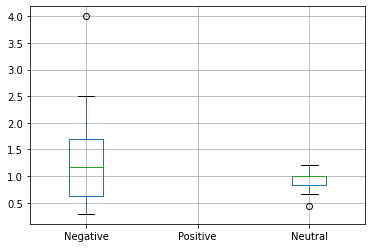

In [76]:
ax = plt.axes()
src.groupby('sentiment_target').boxplot(column = 'neg_to_pos_aftertarget',subplots=False)
ax.set_xticklabels(src.sentiment_target.cat.categories)

### All analyzed cases

In [ ]:
print(f"# of cases where more or same number of negative & positive non-target in total: {src.loc[(src.neg_to_pos_aftertarget>= 1)].shape[0]}")

### Calculated under each sentiment type
\# of cases where ratios were equal or more than 1

In [ ]:
src.loc[src.neg_to_pos_aftertarget >=1,'sentiment_target'].value_counts(sort=False)

In [ ]:
src.sentiment_target.value_counts(sort=False)

## Reply

In [59]:
reply.groupby('sentiment_target')['neg_to_pos_aftertarget'].describe()

,count,mean,std,min,25%,50%,75%,max
sentiment_target,,,,,,,,
Negative,279.0,1.196882,0.869998,0.09,0.50,1.0,1.500,6.0
Positive,162.0,1.251296,0.886032,0.08,0.50,1.0,1.875,4.0
Neutral,123.0,1.365935,1.079974,0.14,0.55,1.0,2.000,6.0


[Text(1, 0, 'Negative'), Text(2, 0, 'Positive'), Text(3, 0, 'Neutral')]

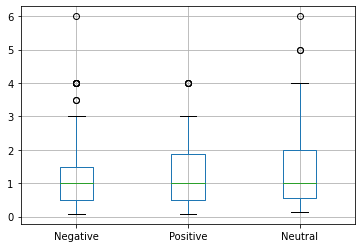

In [75]:
ax = plt.axes()
reply.groupby('sentiment_target').boxplot(column = 'neg_to_pos_aftertarget',subplots=False)
ax.set_xticklabels(reply.sentiment_target.cat.categories)

### All analyzed cases

In [52]:
print(f"# of cases where more or same number of negative & positive non-target in total: {reply.loc[(reply.neg_to_pos_aftertarget>= 1)].shape[0]}")

# of cases where more or same number of negative & positive non-target in total: 366


### Calculated under each sentiment type
\# of cases where ratios were equal or more than 1

In [53]:
reply.loc[reply.neg_to_pos_aftertarget >=1,'sentiment_target'].value_counts(sort=False)

Negative    181
Positive    105
Neutral      80
Name: sentiment_target, dtype: int64

In [60]:
reply.sentiment_target.value_counts(sort=False)

Negative    279
Positive    162
Neutral     123
Name: sentiment_target, dtype: int64

# Line chart

In [ ]:
sns.set_theme(style="ticks")

In [ ]:
def pltcolor(lst):
    cols=[]
    for l in lst:
        if l=='Negative':
            cols.append('red')
        elif l=='Neutral':
            cols.append('blue')
        else:
            cols.append('green')
    return cols

## Source 

In [ ]:
# Create the colors list using the function above
cols=pltcolor(src.sentiment_target)

# markercolor = {'Positive':'green','Negative':'red',"Neutral":'blue'}
plt.figure()
ax = plt.axes()


ax.plot(src.index,src['neg_to_pos_aftertarget'],color='black')
ax.scatter(src.index, src['neg_to_pos_aftertarget'],color= cols,s =24)
plt.xticks(src.index)

plt.title("the sentiment ratios among non-targeting tweets \n after a targeting source tweet arrived")
ax.set_xlabel('targeting source tweet (in time-order)')
ax.set_ylabel('negative-to-positive ratio')

# plt.axhline(y = maxratio, color = 'r', linestyle = 'dotted')
# ax.annotate('infinite ratio: no positive non-targeting tws', 
#              xy=(src.index[-1],maxratio*1.1), xytext=(src.index[-1]*1.05,maxratio),
#             bbox=dict(boxstyle="round", fc="w", ec="lightblue"),
#             arrowprops=dict(arrowstyle="->",color='lightblue'))
# plt.savefig(r"sydneysiege\18 targetanalysis\temporalanalysis\src-sentimentratio.pdf",dpi=1000,bbox_inches='tight')
plt.show()

## Reply analysis

In [ ]:
# !pip install plotly
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
cols=pltcolor(reply.sentiment_target)

layout = dict(plot_bgcolor='rgba(192,192,192,0.2)', paper_bgcolor='rgba(192,192,192,0.2)')
fig = go.Figure(layout=layout)
fig.add_trace(go.Scatter(x=reply.index, y=reply.neg_to_pos_aftertarget,
                    mode='lines+markers',
                    name='lines+markers',marker_size=5, marker_color=cols,line_color='rgb(0,0,0)'))
fig.update_layout(
    xaxis_title="targeting reply (in time-order)", yaxis_title="negative-to-positive ratio",
    title="the sentiment ratios among non-targeting tweets<br>after a targeting reply arrived",
           title_x=0.5)

fig.show()
fig.write_html("reply-sentimentratio.html")

In [ ]:
cols=pltcolor(reply.sentiment_target)

plt.figure(figsize=(16,8))
ax = plt.axes()
ax.plot(reply.index, reply['neg_to_pos_aftertarget'],color='dimgray',alpha = 0.8)
ax.scatter(reply.index, reply['neg_to_pos_aftertarget'],color= cols,s =26)
plt.title("the sentiment ratios among non-targeting tweets \n after a targeting reply arrived", size = 17)
ax.set_xlabel('targeting reply (in time-order)')
ax.set_ylabel('negative-to-positive ratio')

plt.savefig('reply-sentimentratio.pdf',dpi=1000,bbox_inches='tight')
plt.show()
